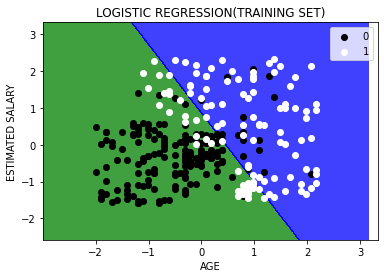

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datasets = pd.read_csv("Social_Network_Ads.csv")
x = datasets.iloc[:,[2,3]].values
y = datasets.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

from sklearn.linear_model import LogisticRegression
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)

from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test,Y_pred)
recall_sensitivity = metrics.recall_score(Y_test,Y_pred,pos_label = 1)
recall_sensiticity = metrics.recall_score(Y_test,Y_pred,pos_label = 0)
recall_sensitivity,recall_sensiticity

from matplotlib.colors import ListedColormap
X_set,Y_set = X_train,Y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(("green","blue")))
plt.xlim(X1.min(),X2.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set == j,1],color = ListedColormap(("black","white"))(i),label = j)
plt.title("LOGISTIC REGRESSION(TRAINING SET)")
plt.xlabel("AGE")
plt.ylabel("ESTIMATED SALARY")
plt.legend()
plt.show()